# IMU

4 May 2019

In [1]:
%matplotlib inline 
from matplotlib import pyplot as plt

In [2]:
import pickle
import numpy as np

In [3]:
fname = "../../dev/imu/imu-rpi.2019-05-04-20:47:18.445193.pickle.bag"
with open(fname, 'rb') as fd:
    data = pickle.load(fd)

In [33]:
accel = data['accel']
mag = data['mag']
gyro = data['gyro']

In [122]:
def hist(data):
    """
    Plots the x y z values of data from a bag file
    
    data = [((x,y,z), timestamp), ((x,y,z), timestamp), ...]
    """
    m = []
    sd = []
    for i in range(3):
        x = [x[0][i] for x in data]
        sd.append(np.std(x))
        m.append(np.mean(x))
        ax = ['x', 'y', 'z']
        plt.subplot(1,3,i+1)
        plt.hist(x, 10, density=True)
        plt.grid(True)
        plt.title(ax[i] + "-axis\n Mean {:.3f}\n Std {:.3f}".format(m[i], sd[i]));
    return (m,sd,)

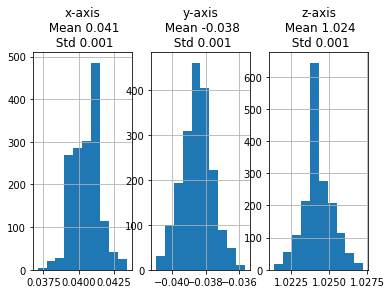

In [123]:
am, astd = hist(accel)

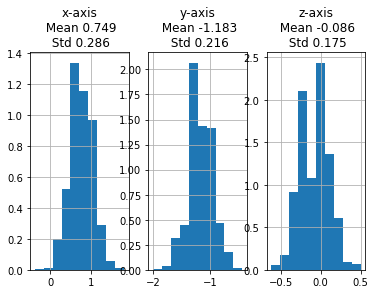

In [124]:
gm, gstd = hist(gyro)

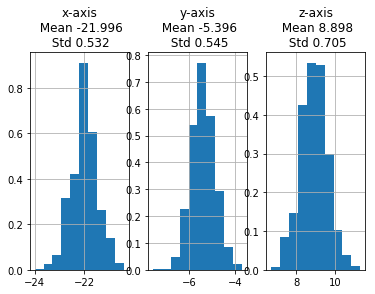

In [125]:
mm, mstd = hist(mag)

In [105]:
def plot2(data, corr=None):
    if not corr:
        corr = [0,0,0]
    s = data[0][1]
    for i in range(3):
        x = np.array([x[0][i] for x in data]) - corr[i]
        sdev = np.std(x)
        plt.subplot(3,1,i+1)
        plt.plot([x[1]-s for x in data], x)
        plt.grid(True);

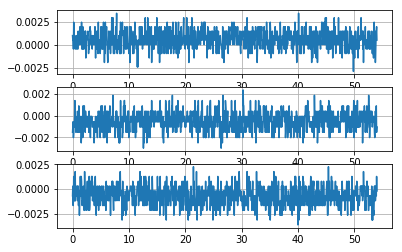

In [114]:
plot2(accel,[0.04,-0.038,1.025])

In [126]:
def plot2d(data, corr=None):
    if corr:
        x = np.array([x[0][0] for x in data]) - corr[0]
        y = np.array([x[0][1] for x in data]) - corr[1]
        plt.plot(x, y)
    
    x = np.array([x[0][0] for x in data])
    y = np.array([x[0][1] for x in data])
    
    plt.plot(x, y)
    
    plt.grid(True);

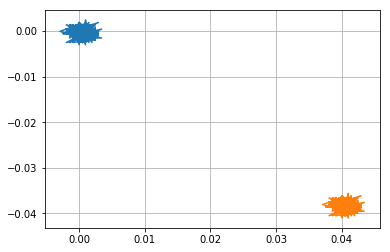

In [127]:
plot2d(accel,[0.04,-0.038,1.025])